C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37420\26232529.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, header=None, delim_whitespace=True, names=column_names)


(404, 13)
(102, 13)
(404, 1)
(102, 1)
Epoch[20/200]Train Loss:41.2553Test Loss:33.4626
Epoch[40/200]Train Loss:17.8636Test Loss:19.3344
Epoch[60/200]Train Loss:13.6904Test Loss:15.9671
Epoch[80/200]Train Loss:11.8147Test Loss:14.1389
Epoch[100/200]Train Loss:10.6083Test Loss:13.0230
Epoch[120/200]Train Loss:9.7116Test Loss:12.2725
Epoch[140/200]Train Loss:9.0504Test Loss:11.8453
Epoch[160/200]Train Loss:8.4679Test Loss:11.3447
Epoch[180/200]Train Loss:7.9136Test Loss:11.1107
Epoch[200/200]Train Loss:7.3997Test Loss:10.7974


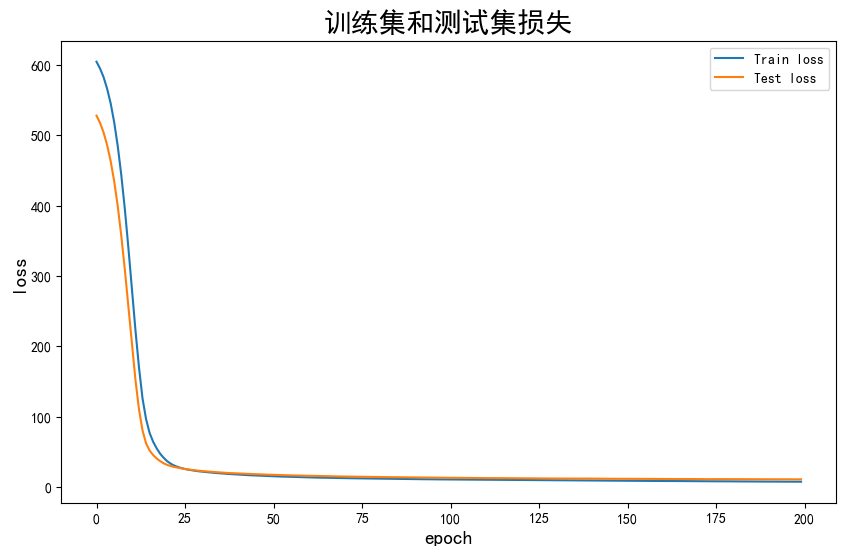

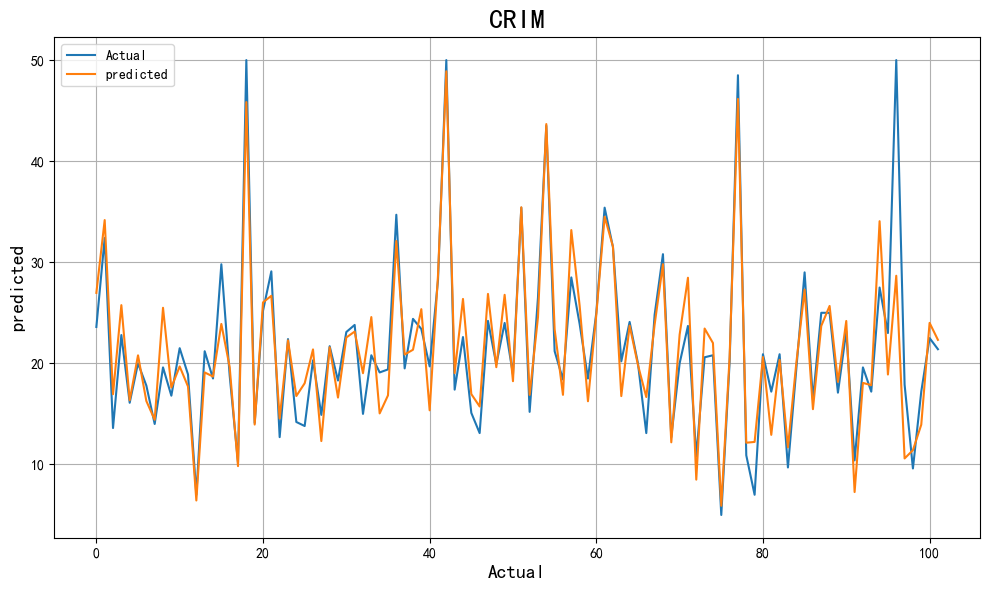

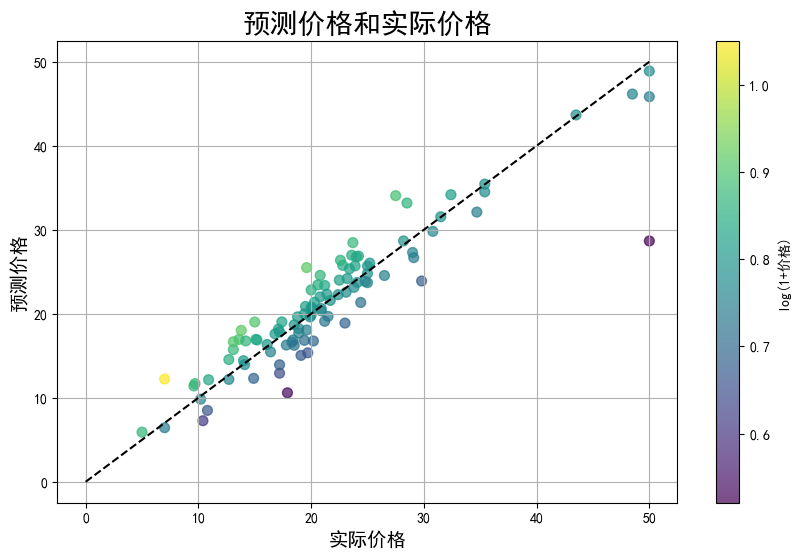


最终结果:
Train RMSE2.7070
Test RMSE:3.2859
MSE:10.7974
MAE:2.1644
R^2:0.8528

示例预测:
输入特征: [-0.4  -0.5  -1.01 -0.28 -0.4   0.14  0.56 -0.55 -0.51 -0.65 -0.77  0.43
 -0.48]
预测价格: 26.97 万美元
真实价格: 23.60 万美元


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score

# 加载波士顿房价数据集（需要科学上网或使用本地数据）
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# 从URL加载数据
data = pd.read_csv(url, header=None, delim_whitespace=True, names=column_names)

# 分离特征和目标
X = data.drop('MEDV', axis=1).values
y = data['MEDV'].values.reshape(-1, 1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)#训练集特征
print(X_test.shape)#训练集标签/目标值
print(y_train.shape)#测试集特征
print(y_test.shape)#测试集标签/目标值
#数据标准化/归一化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#将数据转换为pytorch的TENSOR
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

#创建数据加载器
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)
print(train_loader)
print(test_loader)

#创建神经网络模型
class housing_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(13,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self,x):
        return self.network(x)

#初始化模型、损失函数和优化器
model = housing_NN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

#训练参数
num_epochs = 200
train_losses = []
test_losses = []

#训练模型
for epoch in range(num_epochs):
    #训练模式
    model.train()
    train_loss = 0.0
    for inputs,targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    #计算平均训练损失
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

     #评估模型
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs,targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            test_loss += loss.item() * inputs.size(0)

    #计算平均测试损失
    test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    #打印训练进度
    if(epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}]'f'Train Loss:{train_loss:.4f}'f'Test Loss:{test_loss:.4f}')


import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pre =[]
act = []
for i in range(len(test_dataset)):
    p = model(test_dataset[i][0].unsqueeze(0).float())
    pre.append(p.item())
    act.append(test_dataset[i][1].item())
#绘制测试和损失曲线
plt.figure(figsize = (10,6))
plt.plot(train_losses,label = 'Train loss')
plt.plot(test_losses,label = 'Test loss')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('训练集和测试集损失',fontsize = 20)
plt.legend()
plt.show()
#绘制预测值和实际值的折线图
plt.figure(figsize= (10,6))
plt.plot(act,label = 'Actual')
plt.plot(pre,label = 'predicted')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('CRIM',fontsize = 20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#绘制预测值和实际值的散点图
plt.figure(figsize=(10,6))
plt.scatter(act,pre,
            c = np.arctan2(pre,act),
            s = 50,
            alpha=0.7,
            cmap = "viridis")
plt.colorbar(label = 'log(1+价格)')
plt.plot([0,50],[0,50],'--k')
plt.xlabel("实际价格",fontsize = 14)
plt.ylabel("预测价格",fontsize = 14)
plt.title("预测价格和实际价格",fontsize = 20)
plt.grid(True)
plt.show()

#模式评估
model.eval()
with torch.no_grad():
    #训练集评估,计算均方根误差
    train_preds = model(X_train)
    train_rmse = torch.sqrt(criterion(train_preds,y_train))
    mse = mean_squared_error(y_train,train_preds)
    mae = mean_absolute_error(y_train,train_preds)
    r2 = r2_score(y_train,train_preds)
    #测试集评估
    test_preds = model(X_test)
    test_rmse = torch.sqrt(criterion(test_preds,y_test))
    mse = mean_squared_error(y_test,test_preds)
    mae = mean_absolute_error(y_test,test_preds)
    r2 = r2_score(y_test,test_preds)
print(f'\n最终结果:')
print(f'Train RMSE{train_rmse:.4f}')
print(f'Test RMSE:{test_rmse:.4f}')
print(f'MSE:{mse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'R^2:{r2:.4f}')
    #使用测试样本进行预测
sample_input = X_test[0].unsqueeze(0)
model.eval()
with torch.no_grad():
    predicted_value = model(sample_input).item()
    
print(f'\n示例预测:')
print(f'输入特征: {sample_input.squeeze().numpy().round(2)}')
print(f'预测价格: {predicted_value:.2f} 万美元')
print(f'真实价格: {y_test[0].item():.2f} 万美元')